In [14]:
library(SC3)
library(Seurat)
library(SingleCellExperiment)

In [2]:
umi <- readRDS("completely_normalised_data.scran.combat_glm.rds")

In [3]:
umi <- sc3_estimate_k(umi)
rowData(umi)$feature_symbol = rownames(umi)       # must connect this slot for SC3
message("Best guess on the number of clusters: ", metadata(umi)$sc3$k_estimation)

Estimating k...
Best guess on the number of clusters: 4


In [4]:
# Let's run SC3
umi <- sc3(umi, ks = 2:10, biology = TRUE)

Setting SC3 parameters...
Calculating distances between the cells...
Performing transformations and calculating eigenvectors...
Performing k-means clustering...


Calculating consensus matrix...
Calculating biology...


Check the stability...


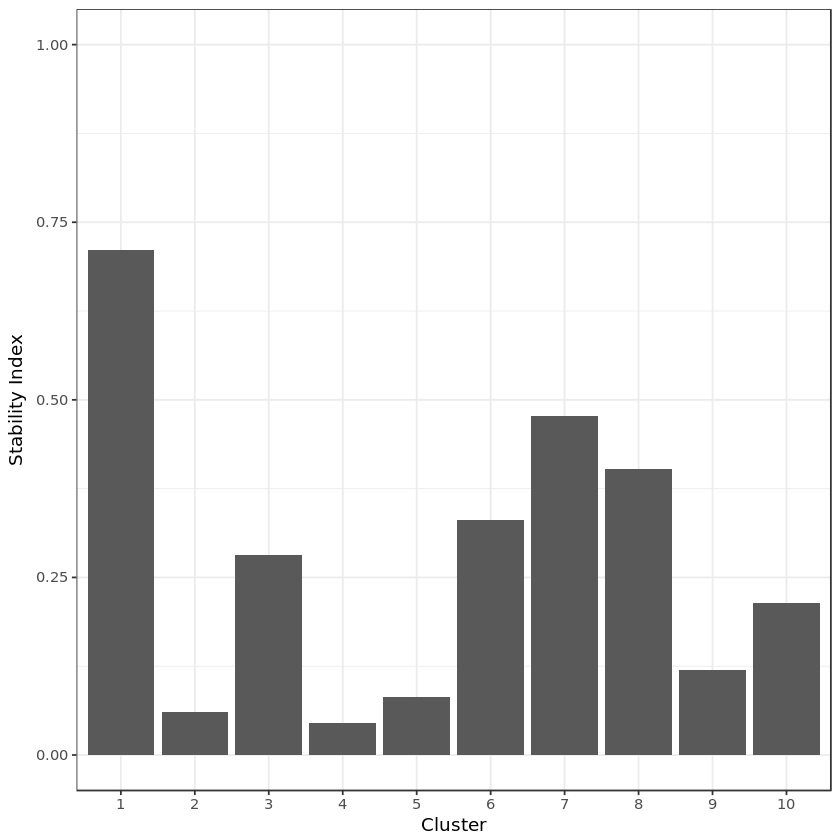

In [5]:
message("Check the stability...")
sc3_plot_cluster_stability(umi, 10)

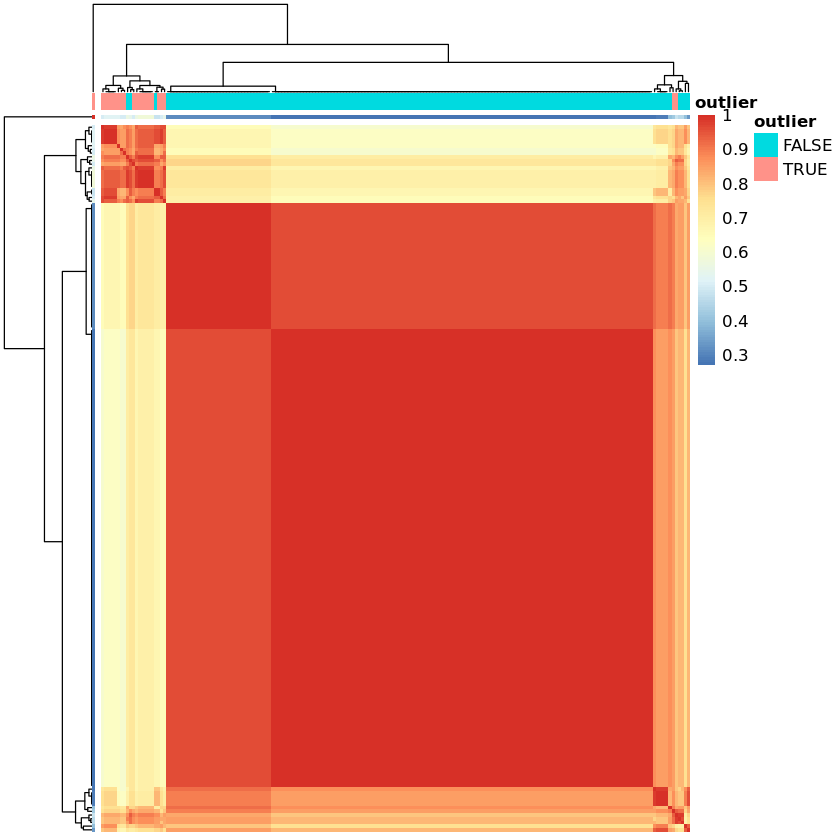

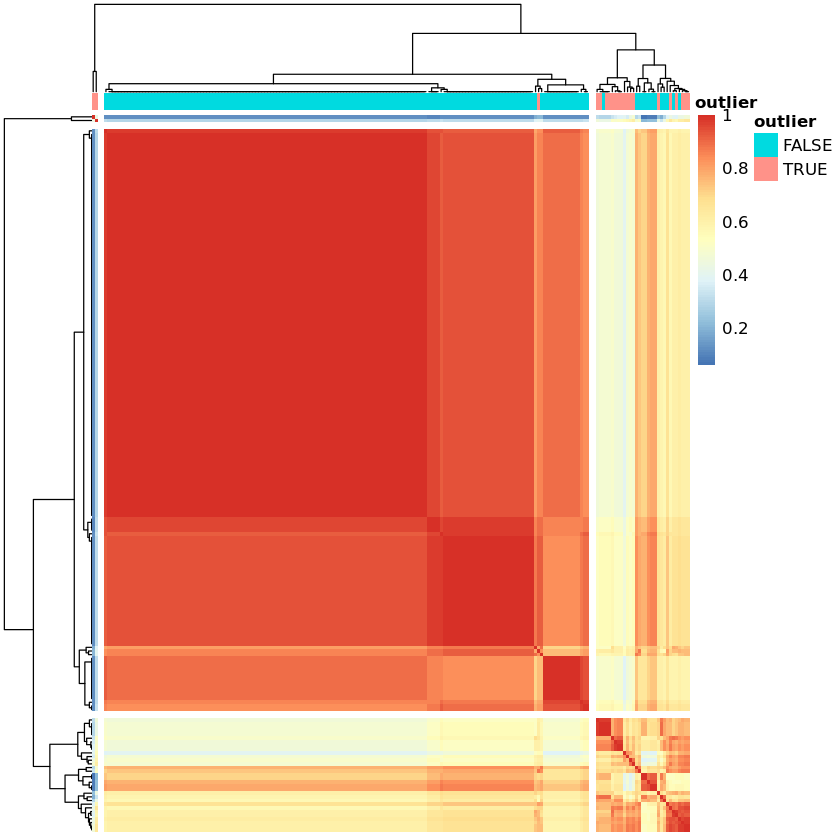

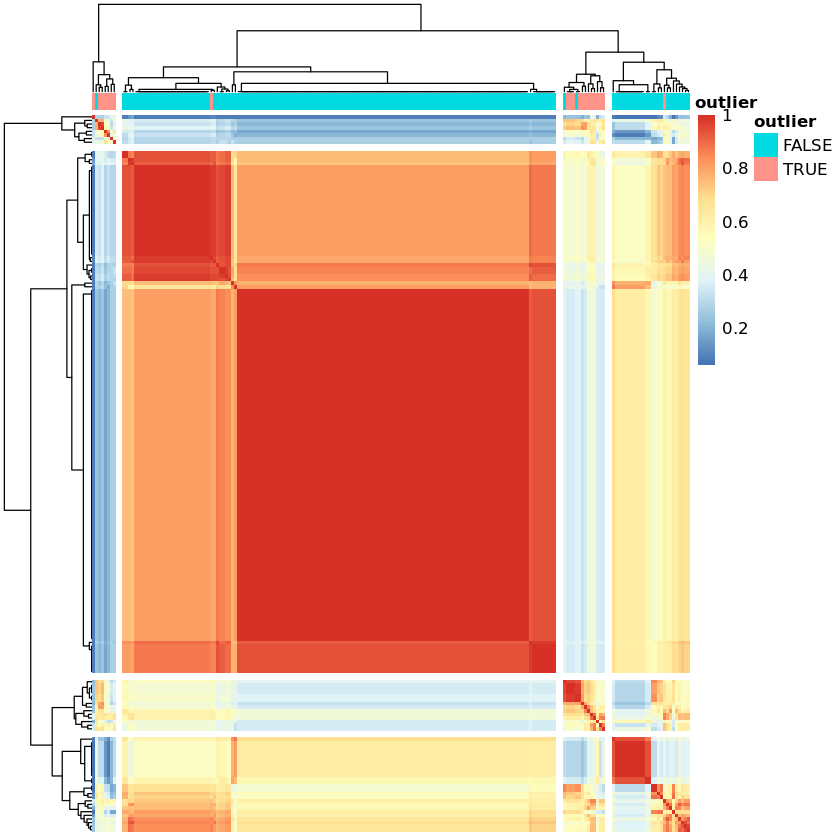

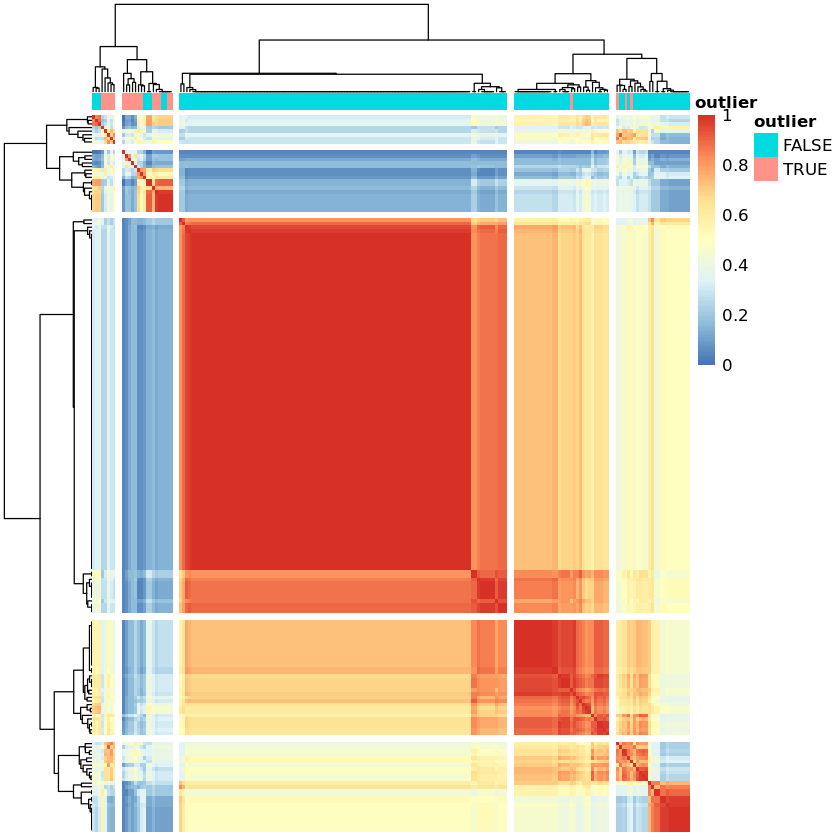

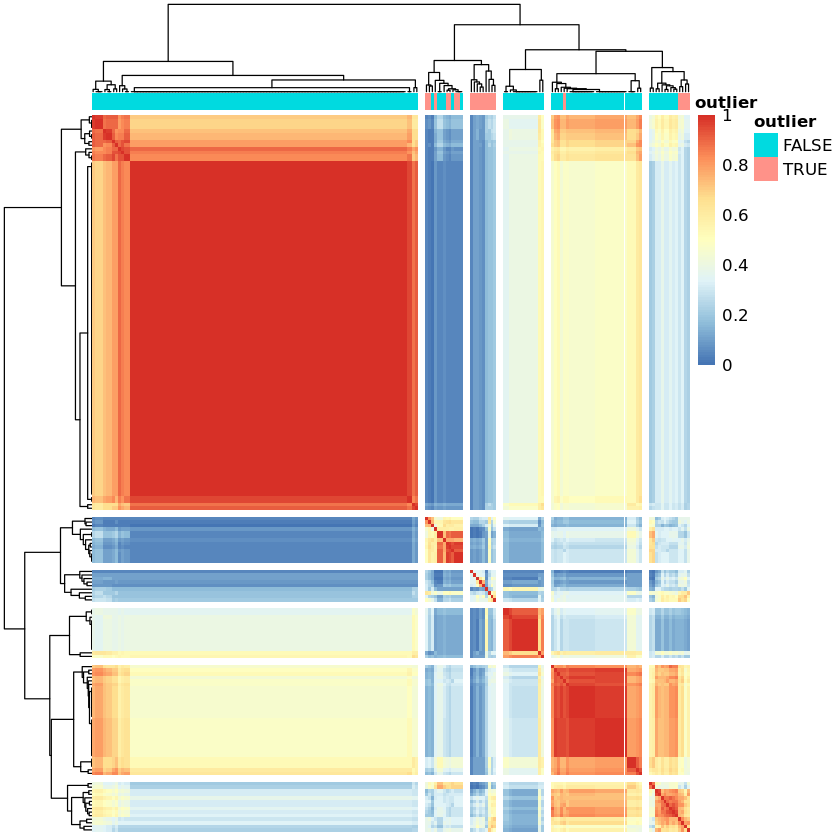

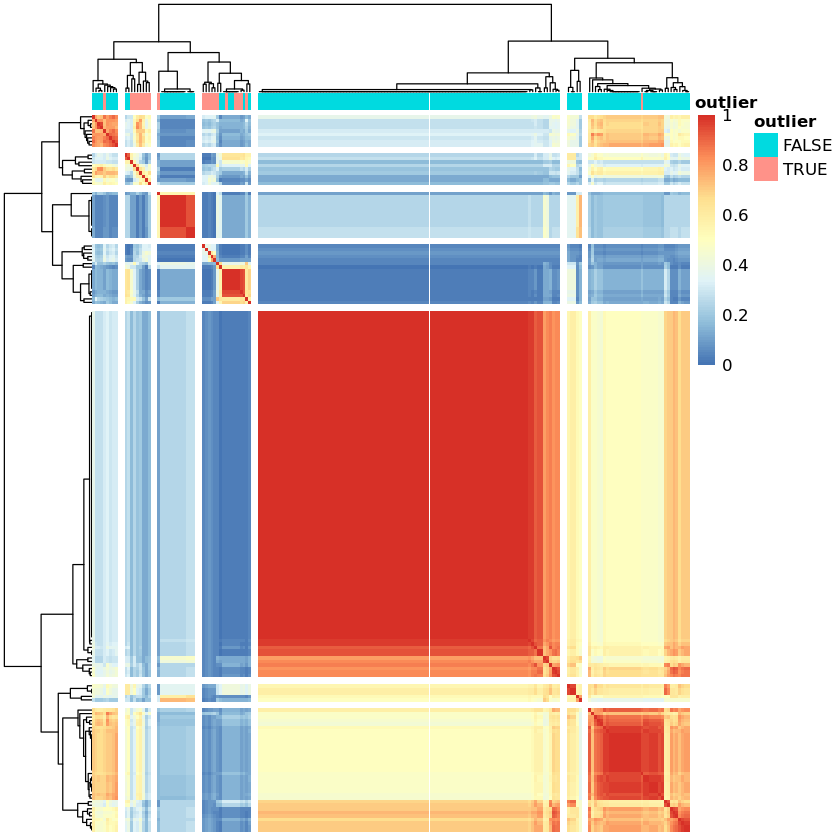

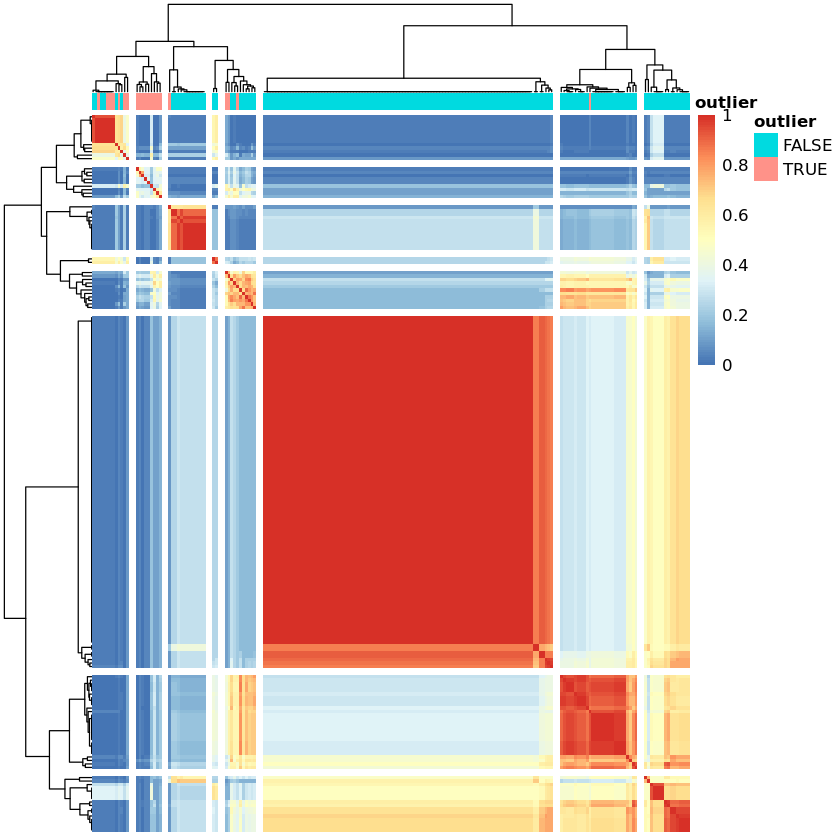

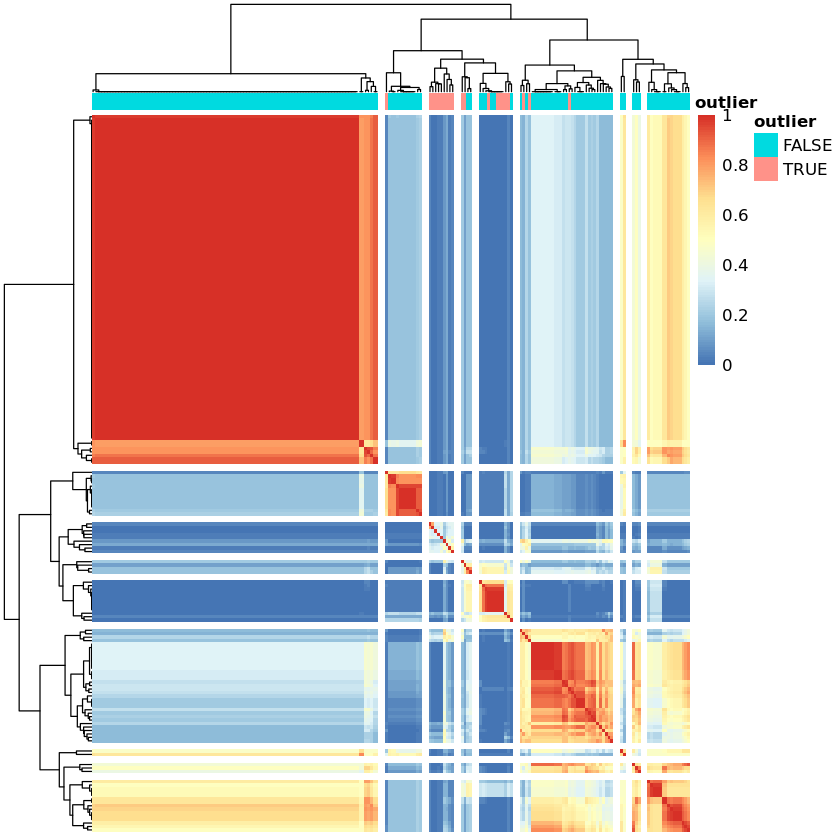

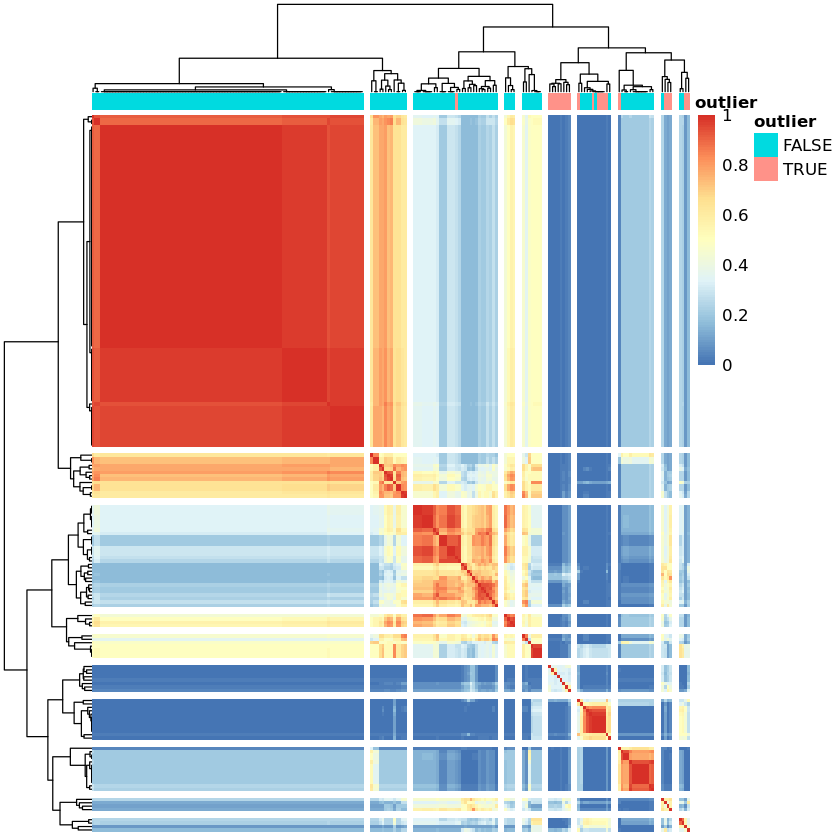

In [6]:
for (k in 2:10){
    sc3_plot_consensus(umi, k, show_pdata = "outlier")
}

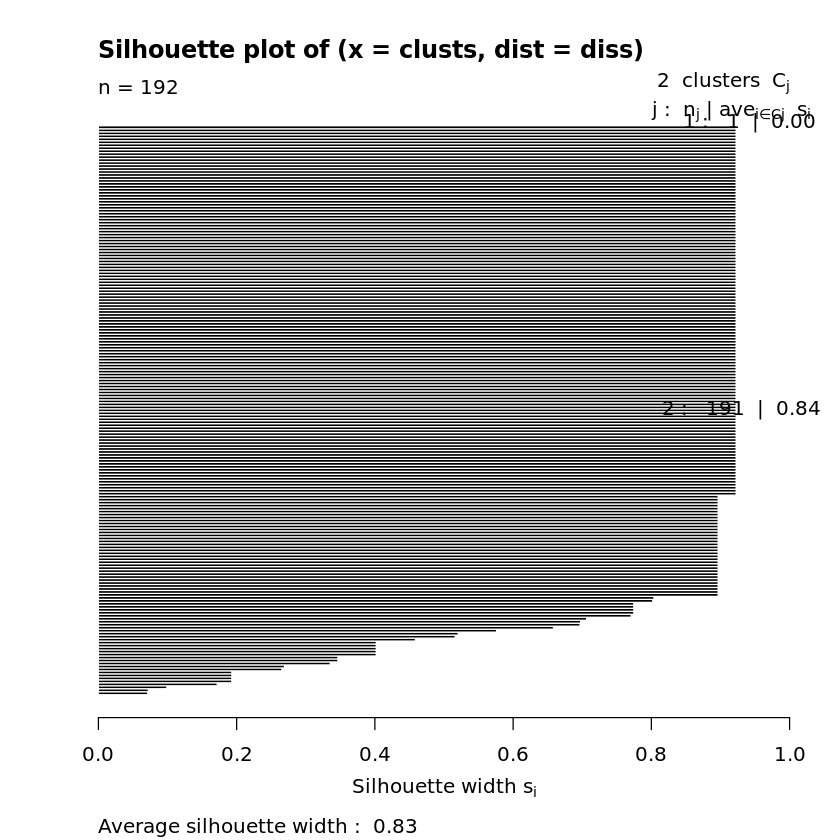

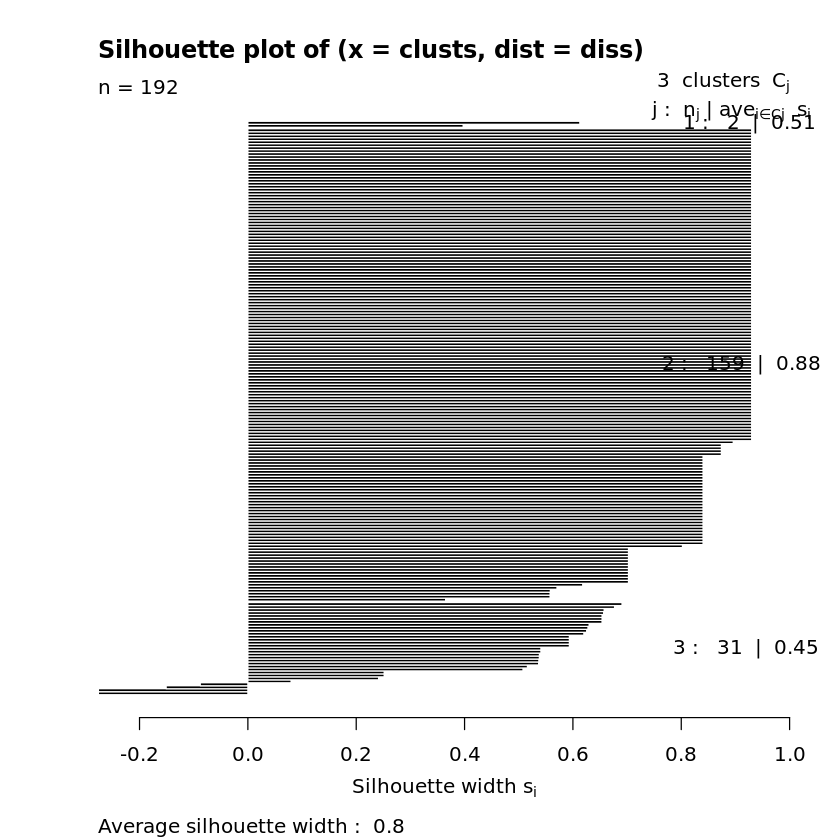

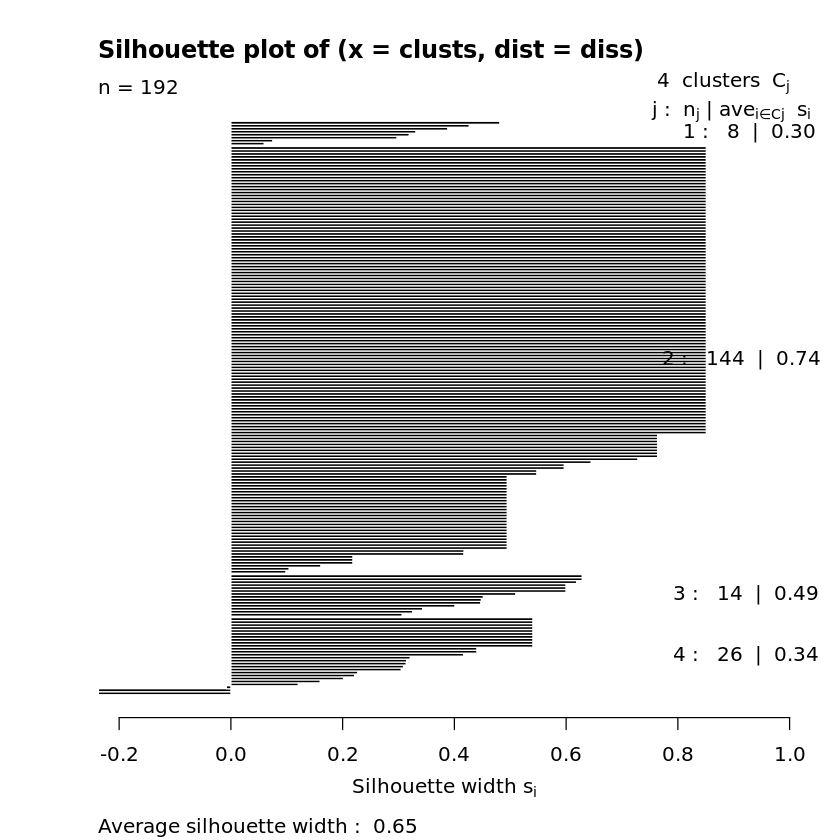

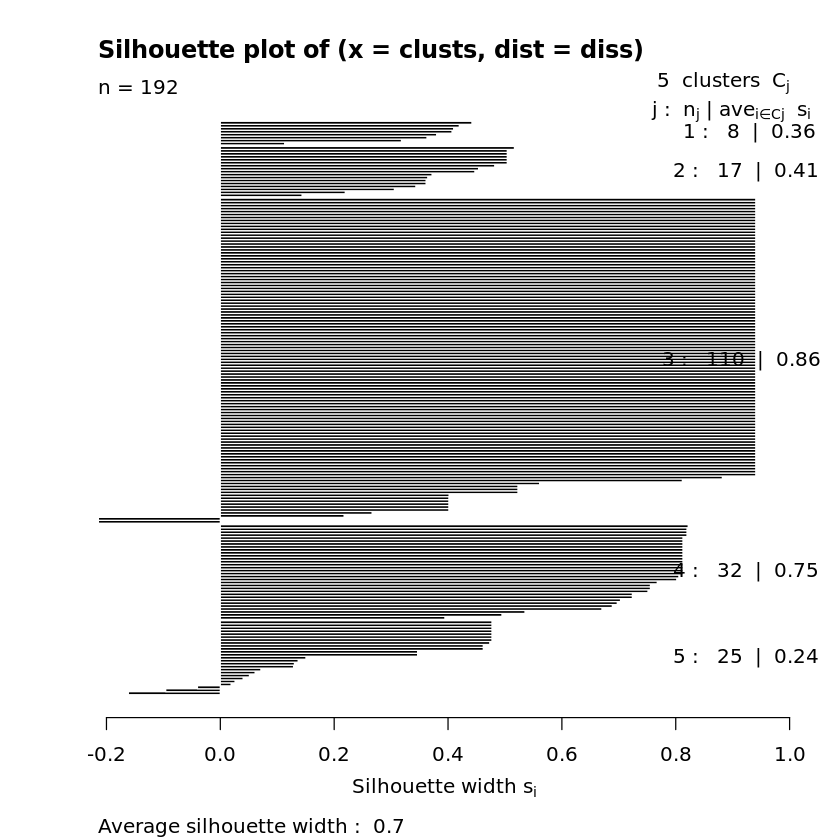

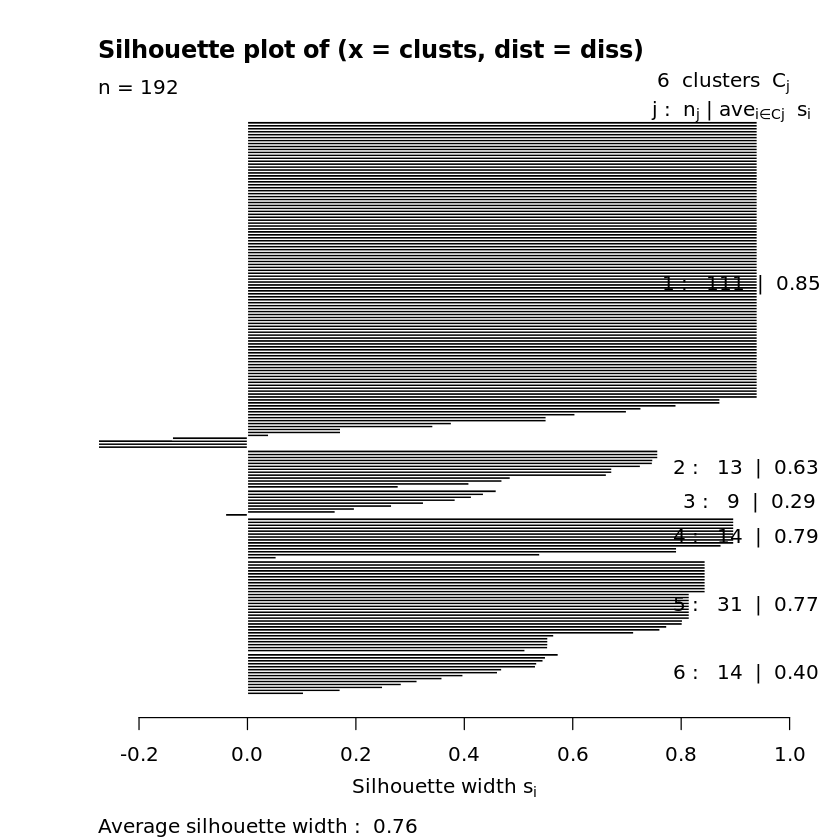

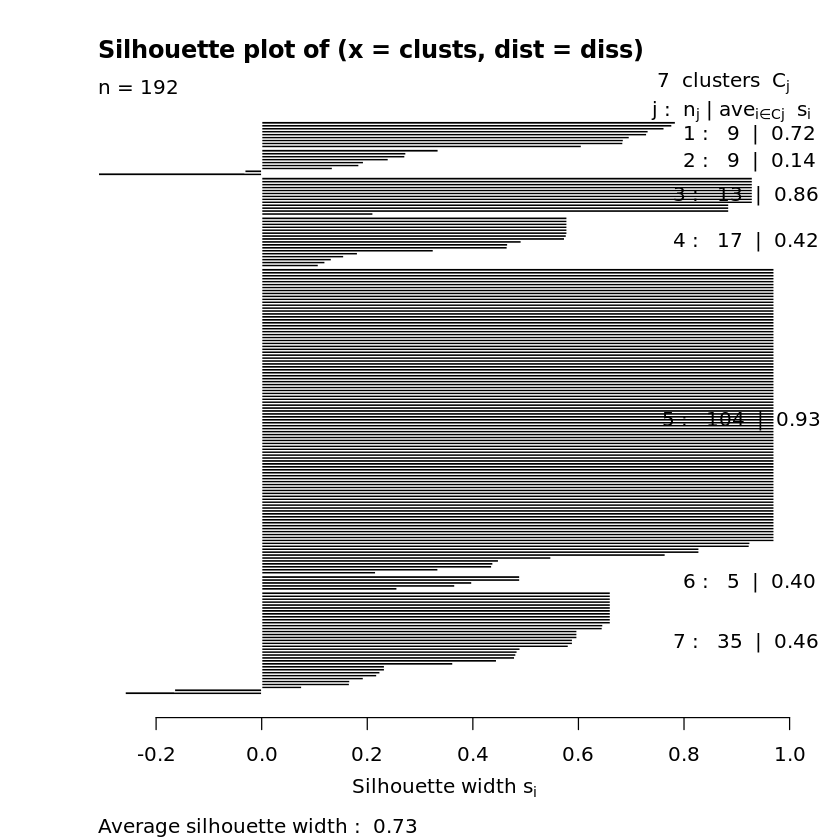

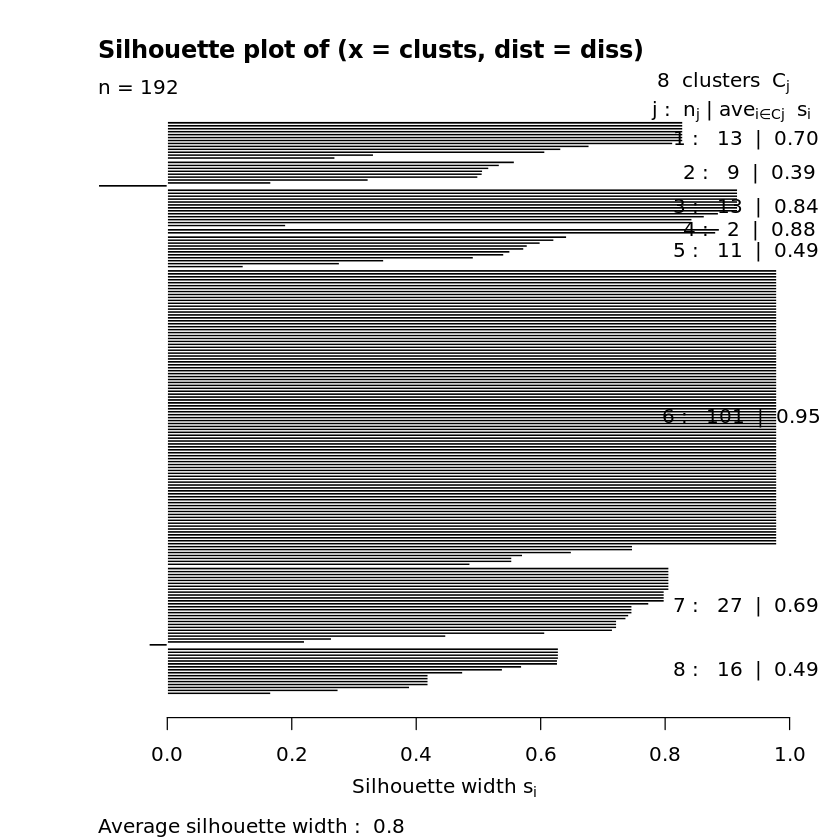

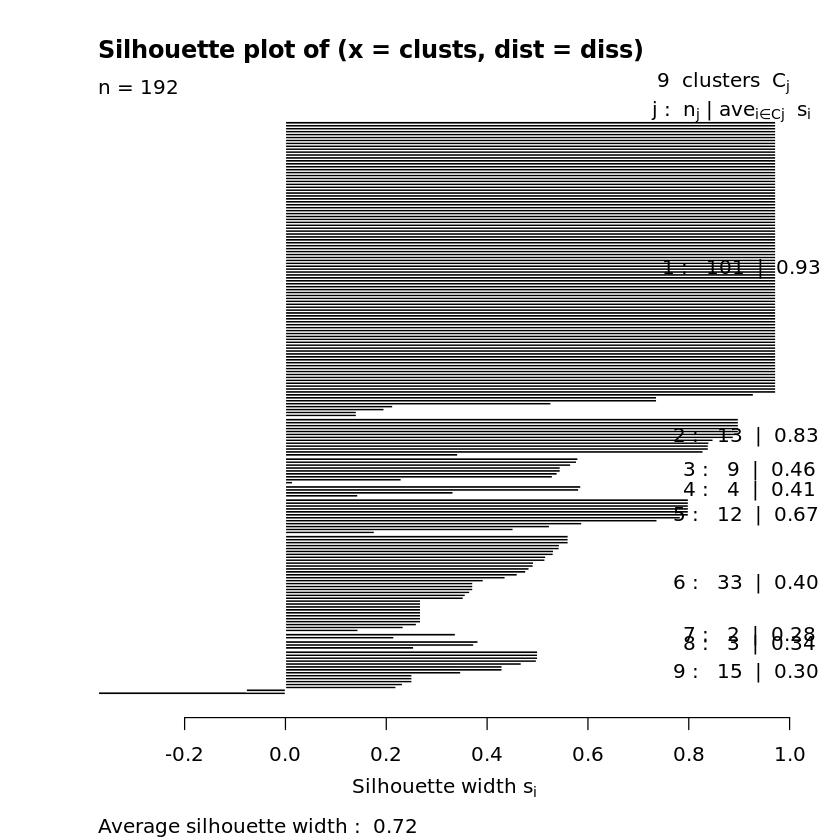

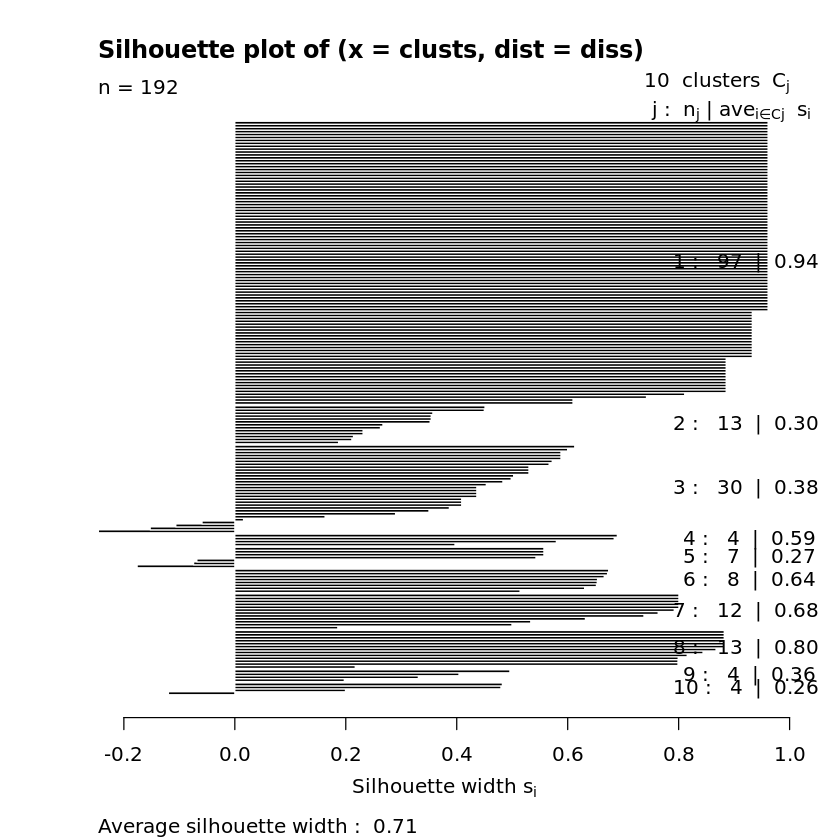

In [7]:
for (k in 2:10){
    sc3_plot_silhouette(umi, k)
}

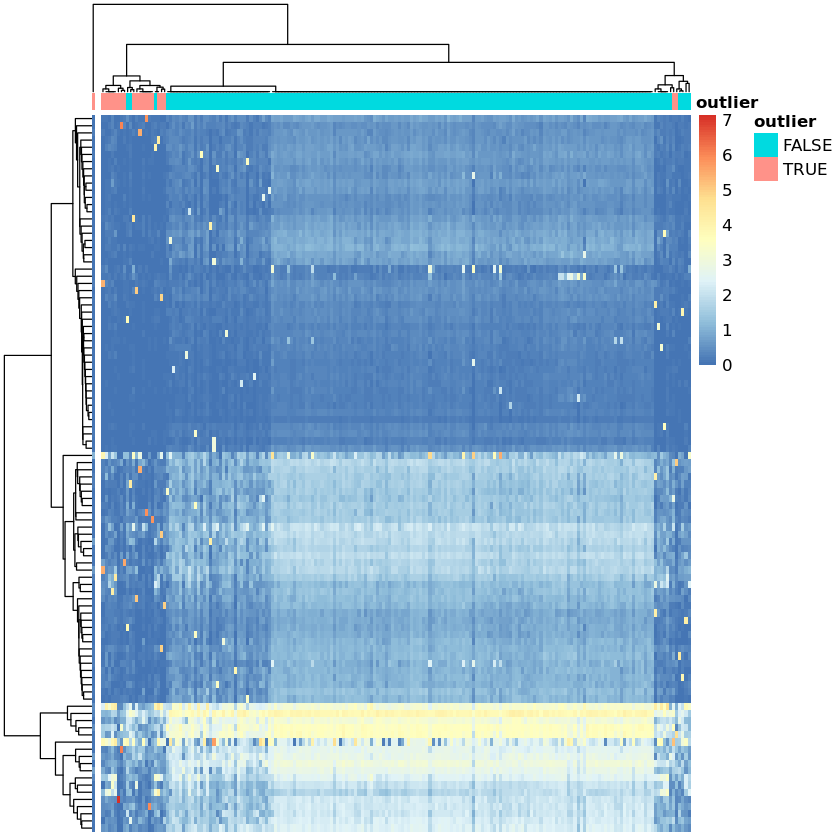

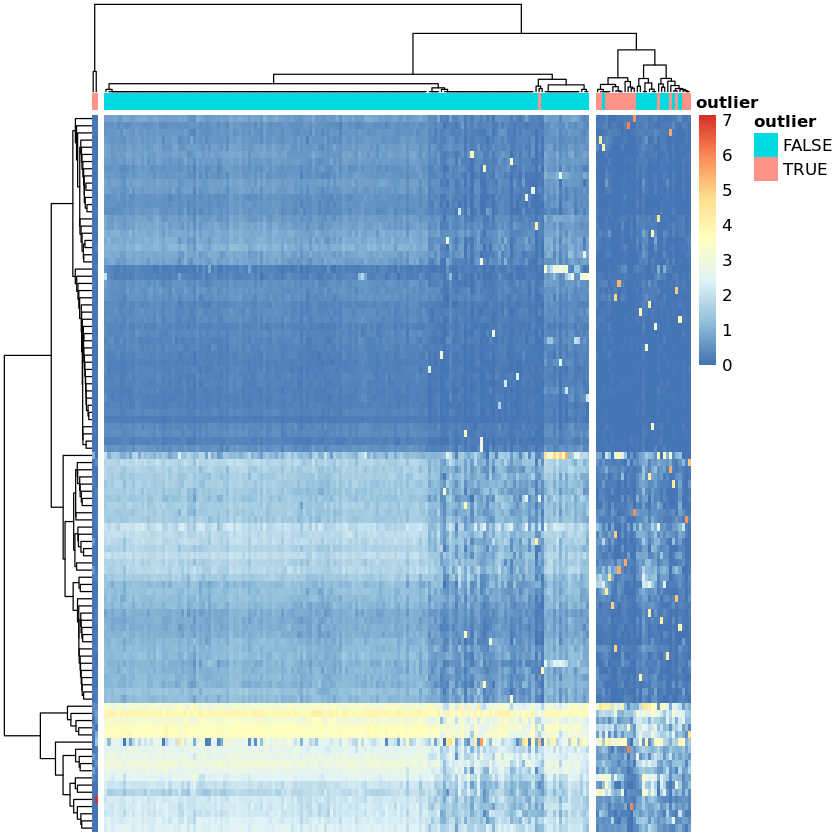

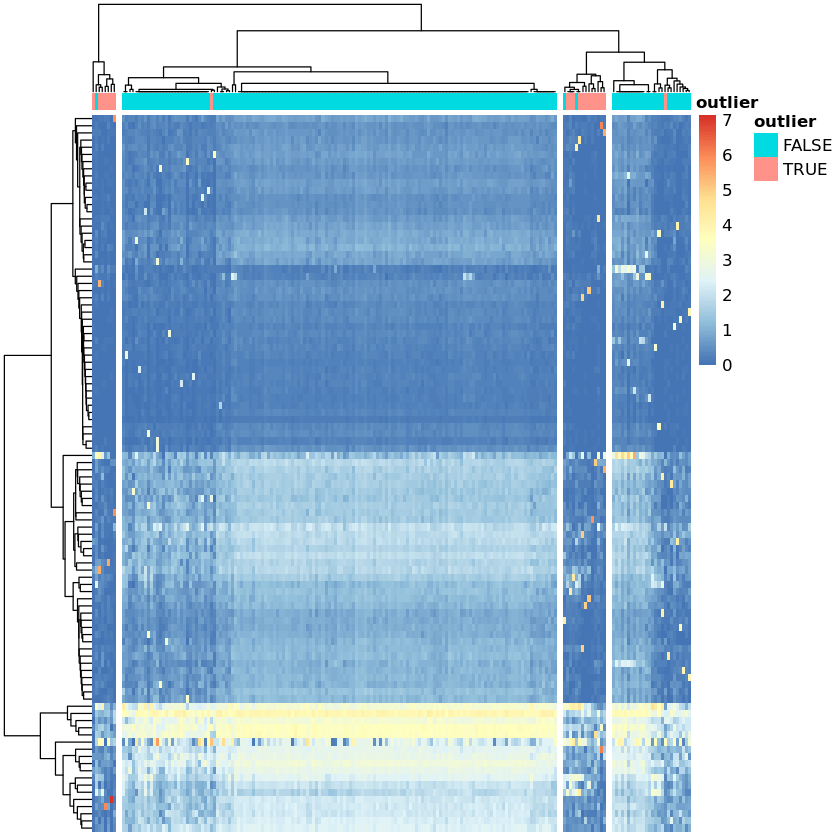

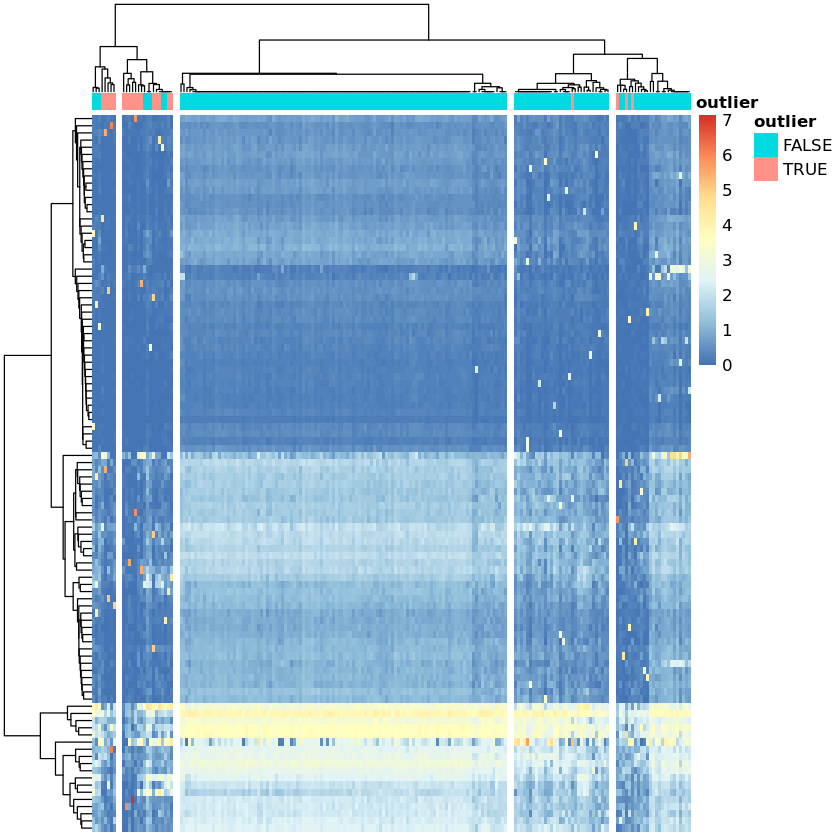

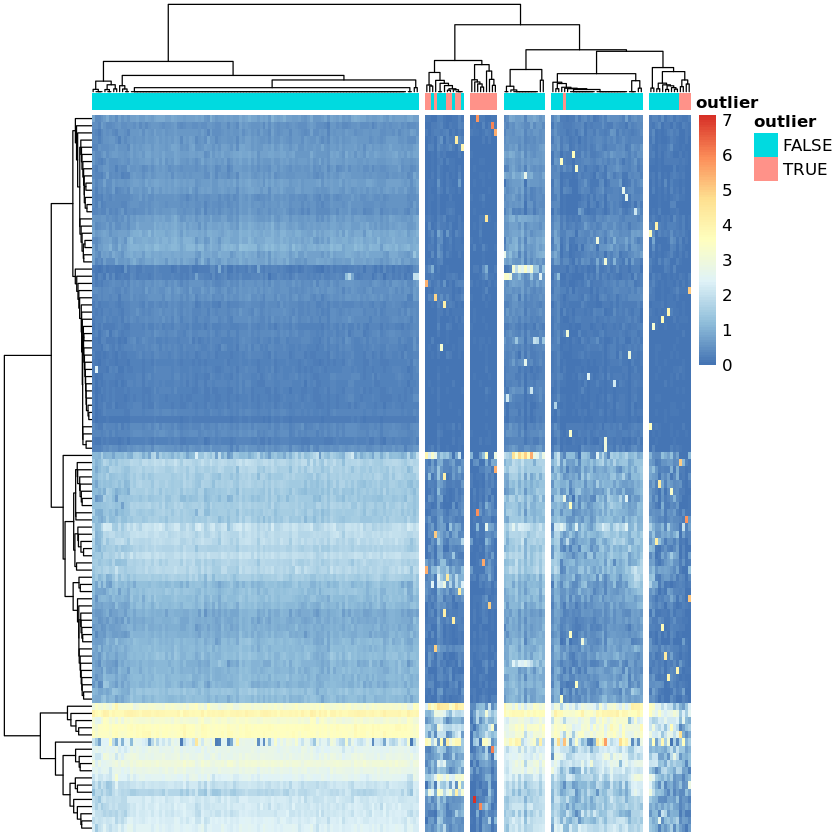

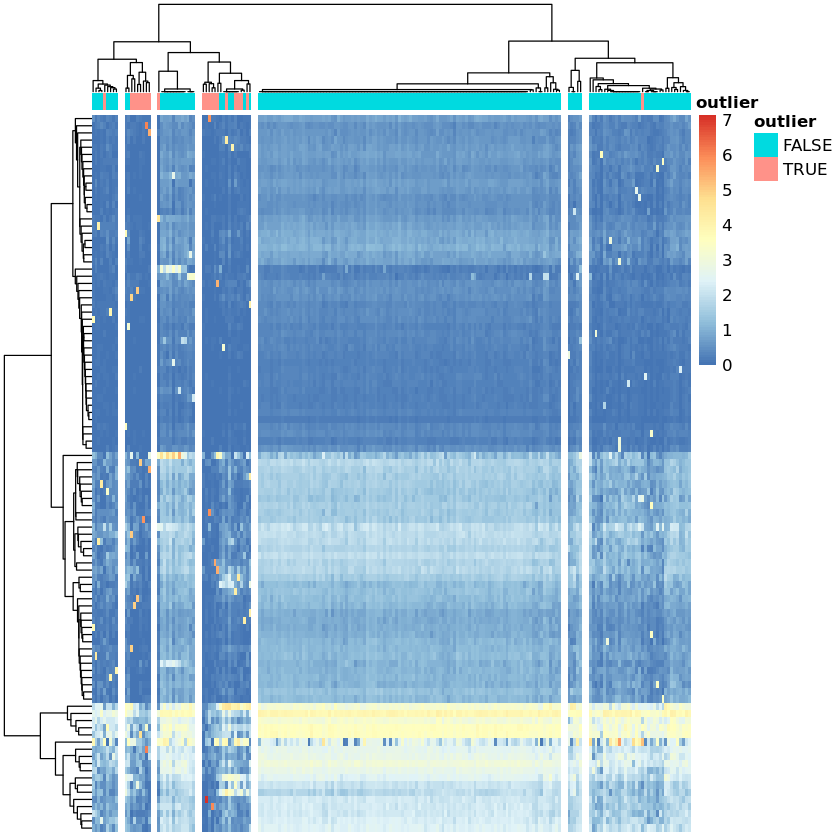

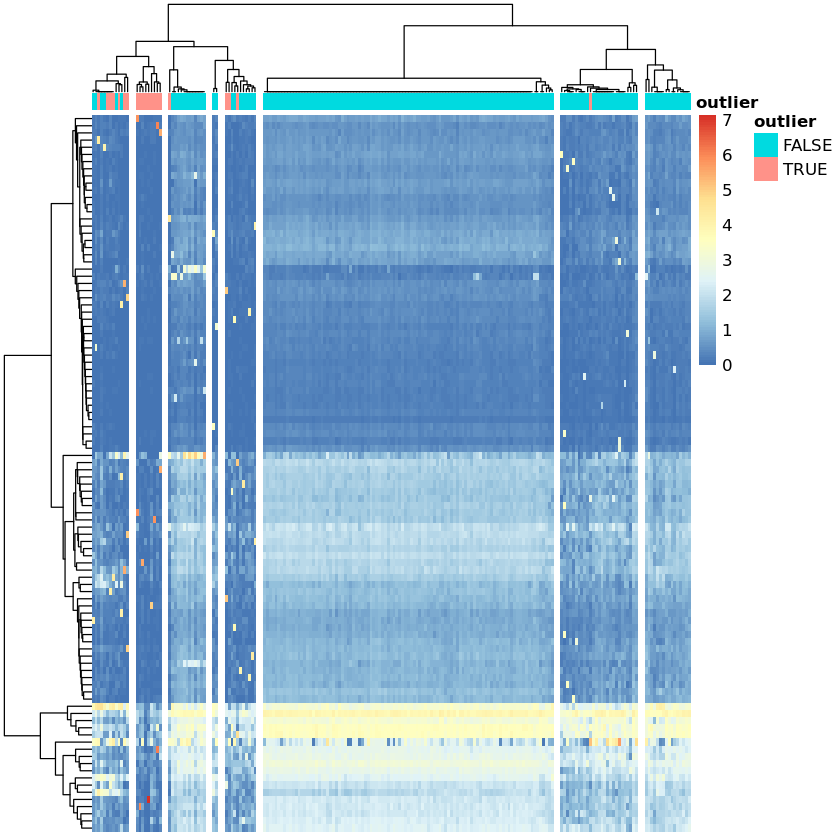

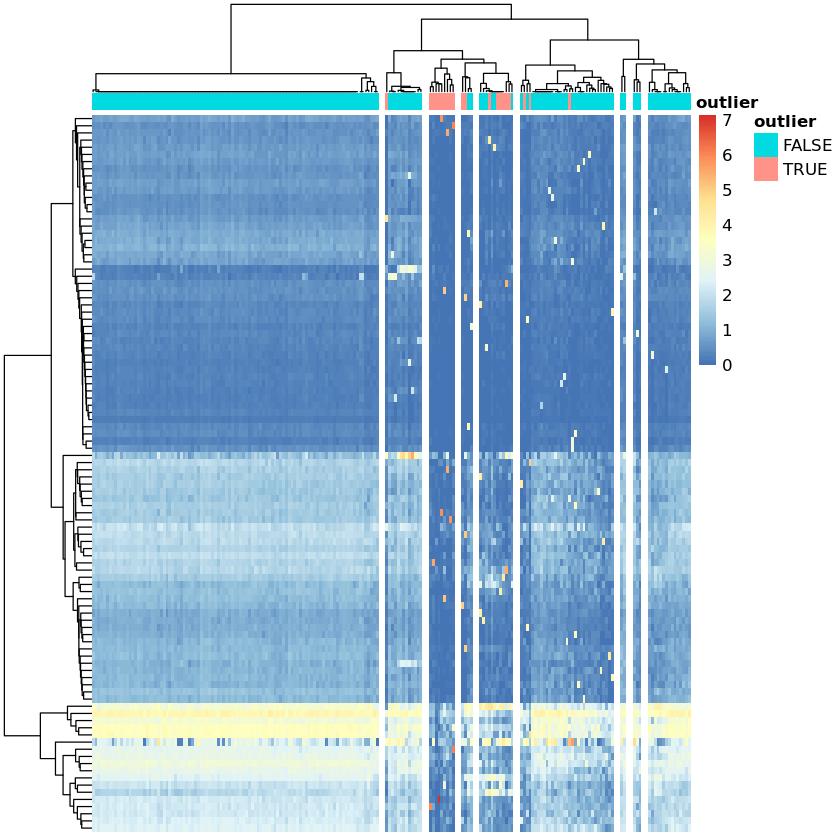

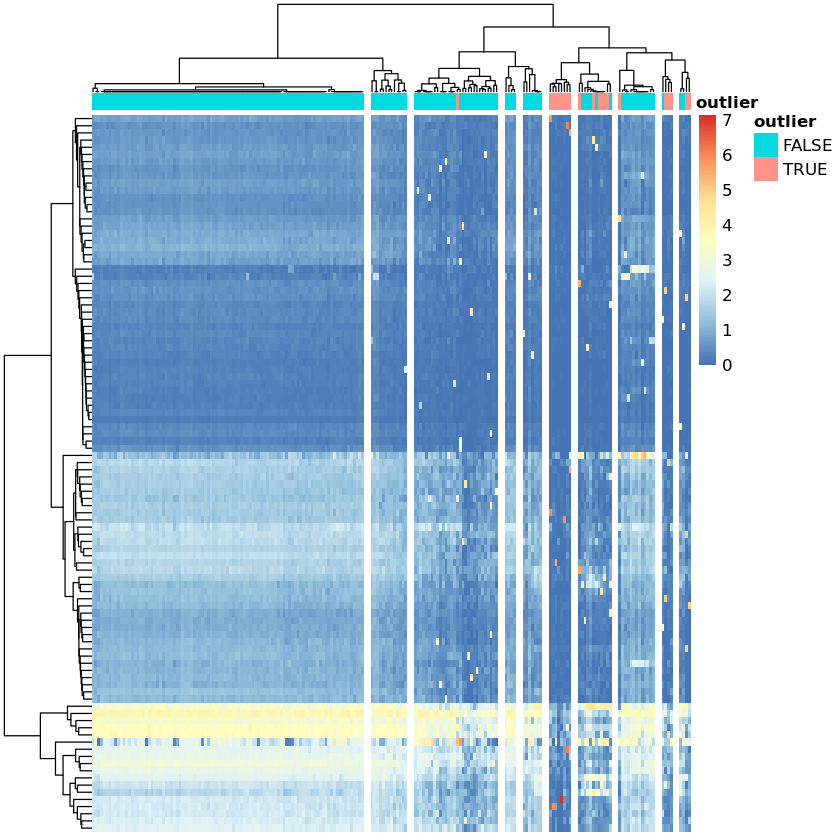

In [8]:
for (k in 2:10){
    sc3_plot_expression(umi, k, show_pdata = "outlier")
}

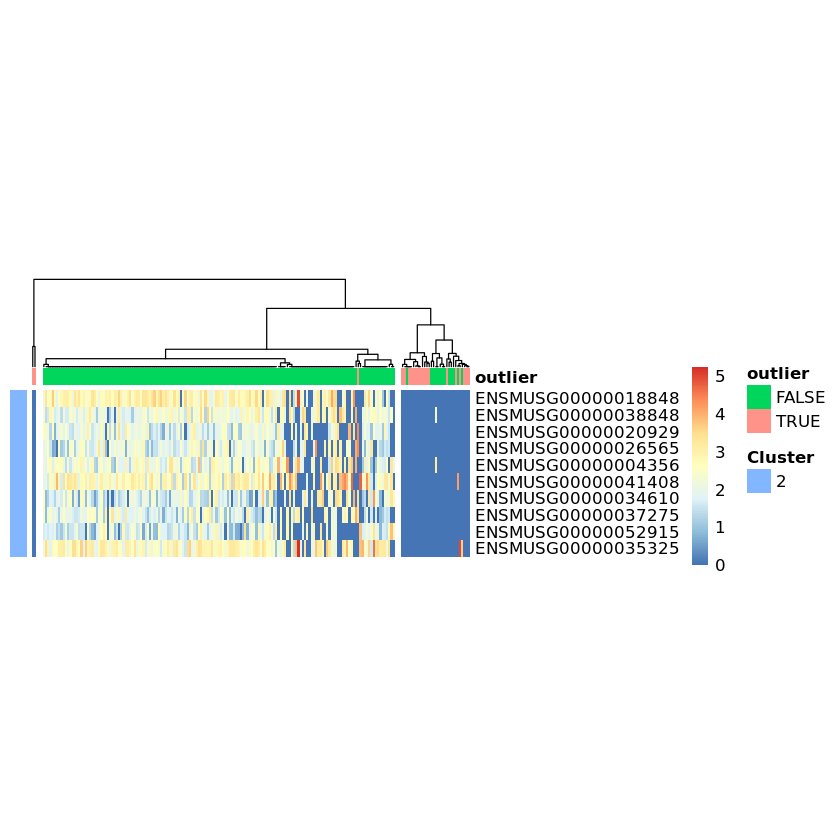

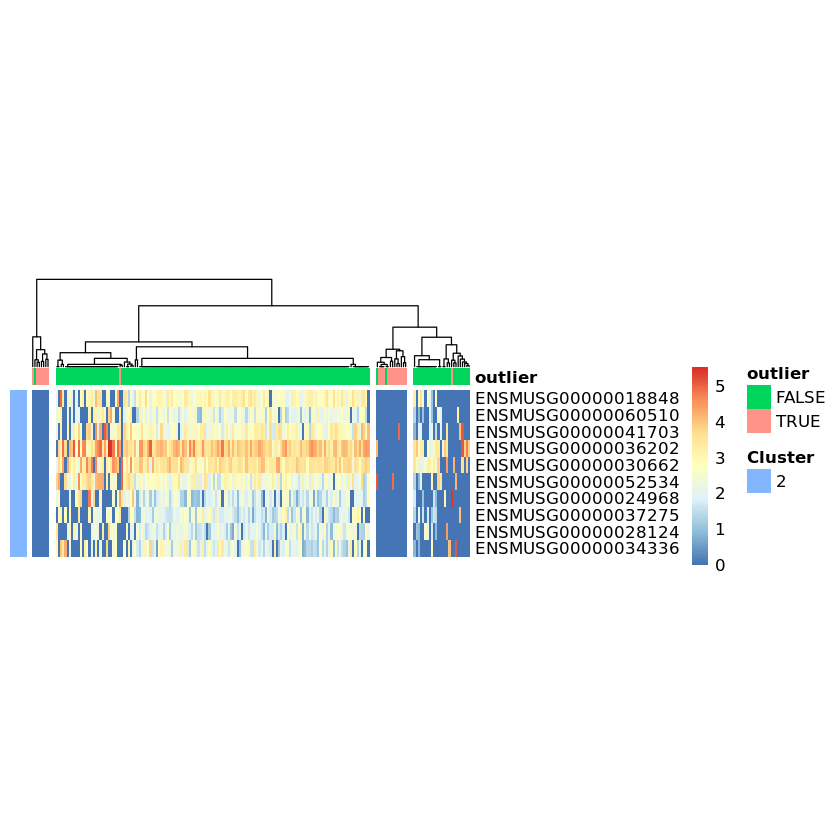

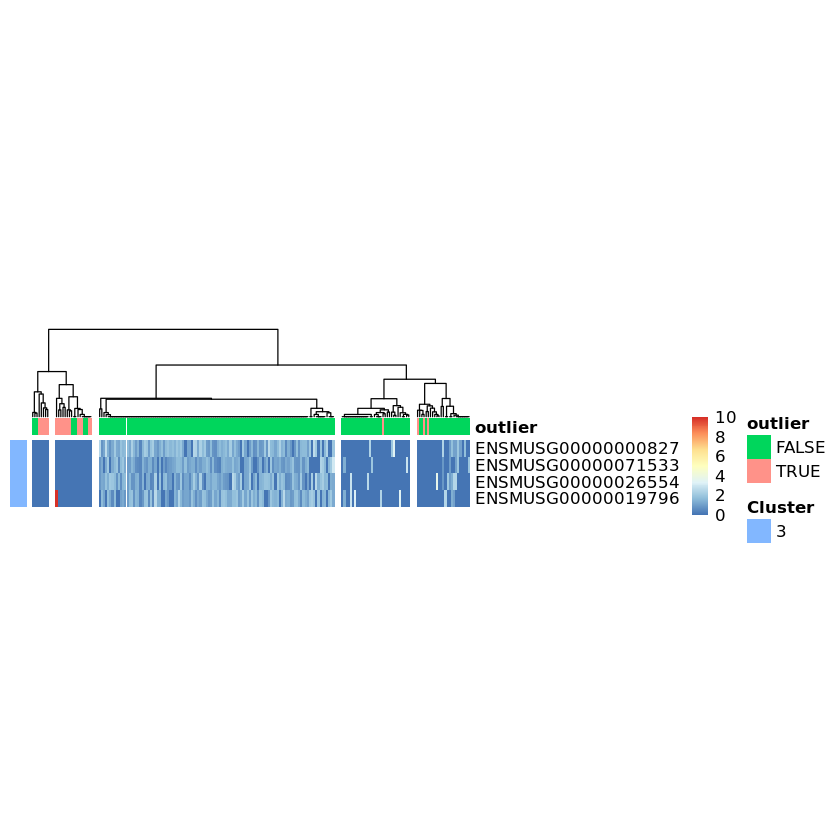

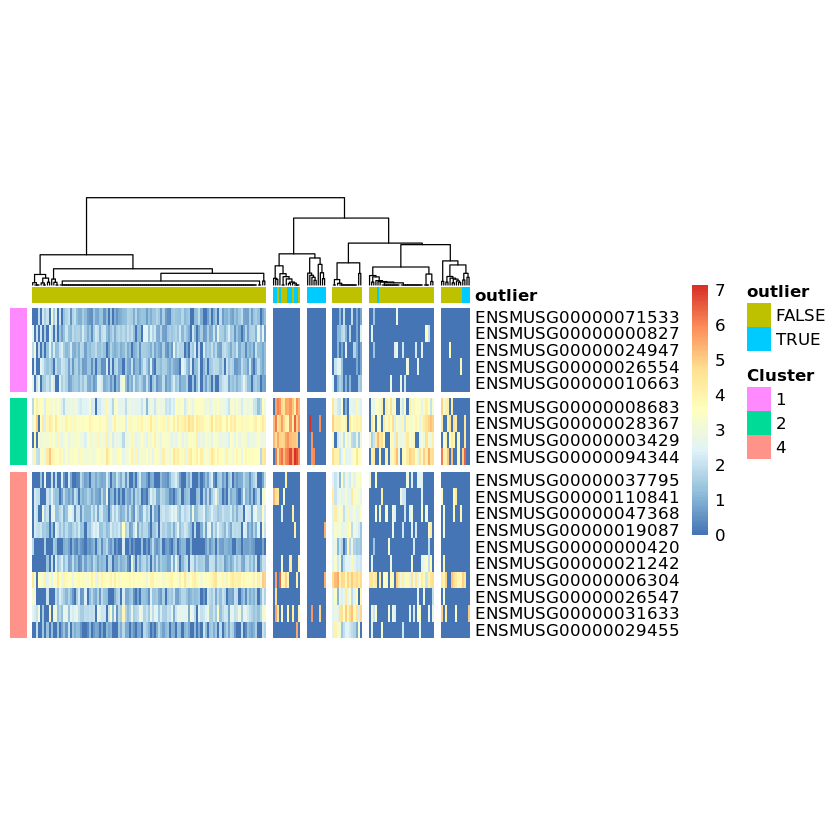

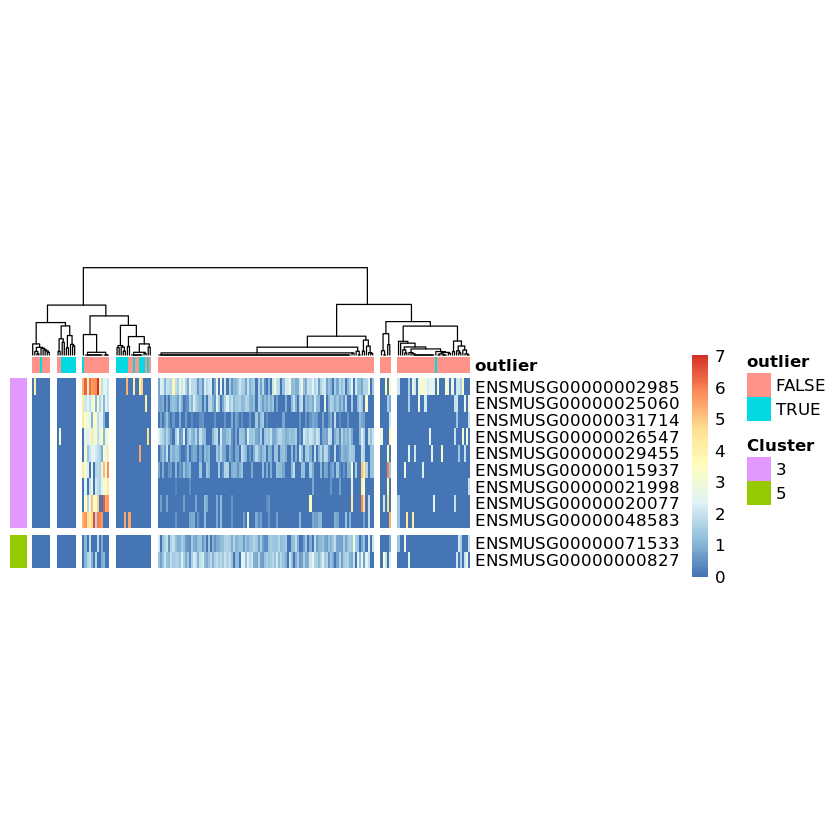

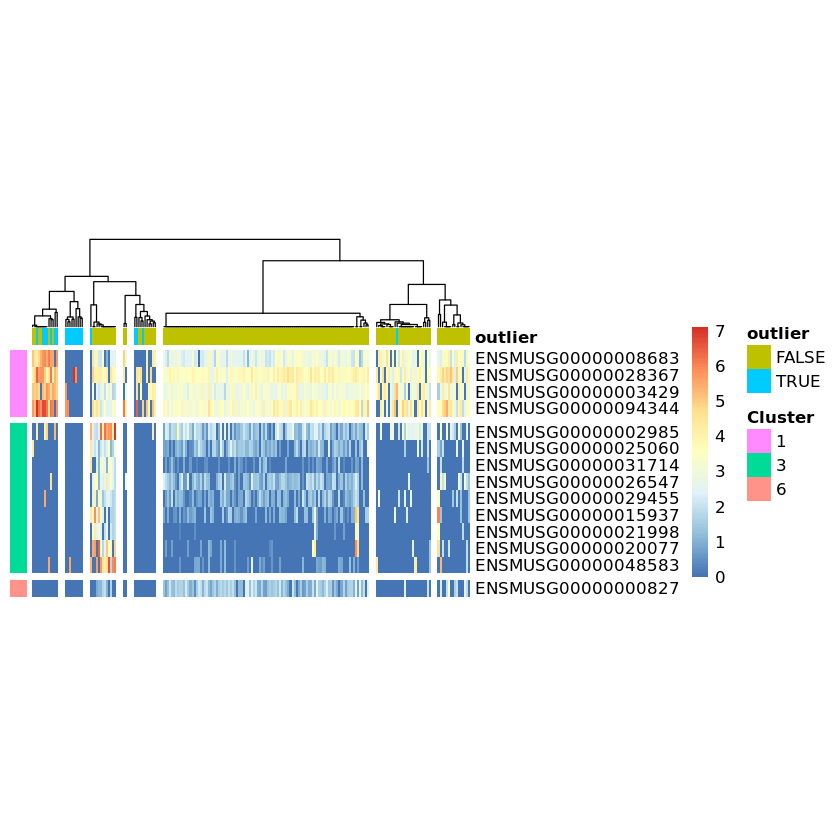

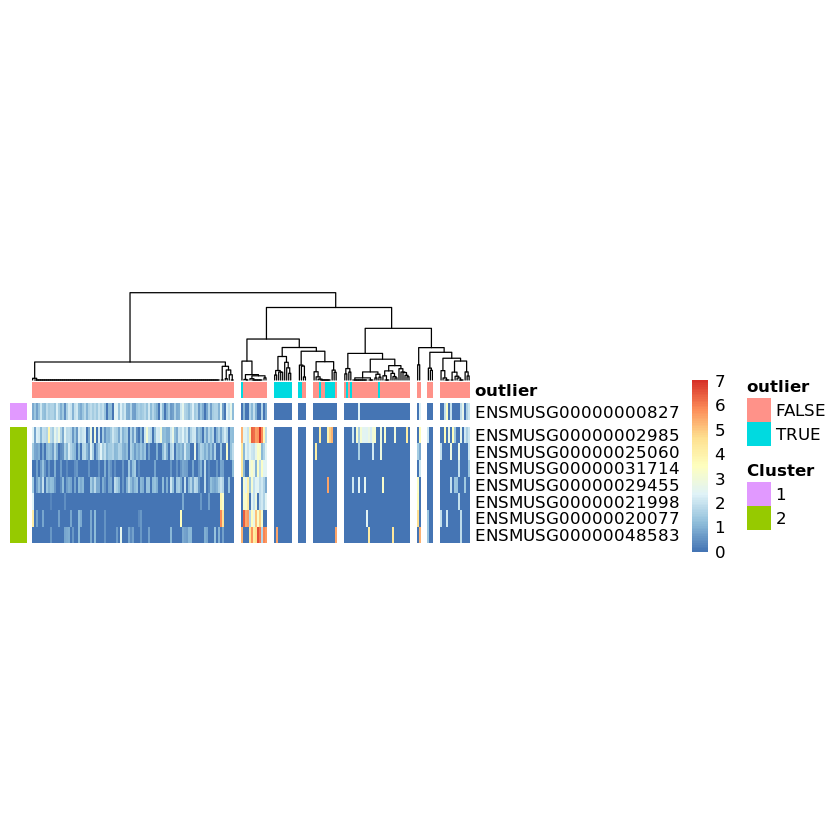

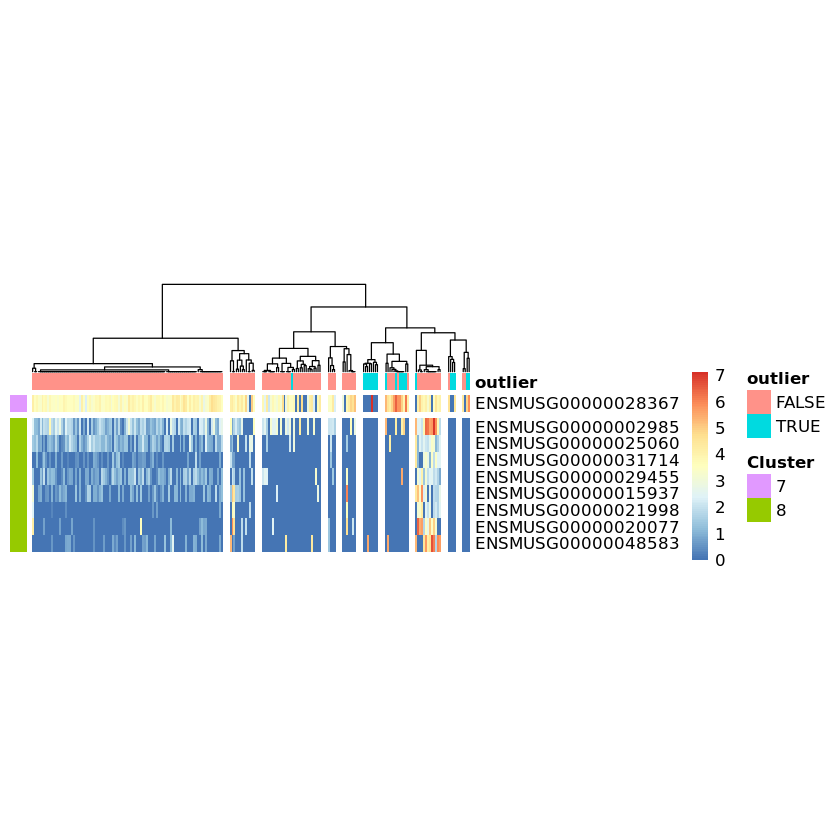

In [12]:
for (i in 3:10){
    sc3_plot_markers(umi, i, show_pdata = "outlier")
}

In [20]:
# save data due to max amount of DLLs
saveRDS(umi, "completely_normalised_data.scran.combat_glm.sc3_clust.rds")